# Wissahickon Soil Strength and Moisture 

### This notebook describes data collected in the Wissahickon park in Philadelphia, PA.
#### *Data was collected on a single hill slope at multiple time points and using different spatiotemporal sampling strategies. The particular hillslope was selected because it was accessible, contained a transect from valley to ridge that could be traversed by both robot and human, and was broadly representative of the hill slopes in the region (elevation monotonically increasing from NE valley to SW ridge).*

<img src="Hillslope.png" width="600" height="300" align="left" />
<img src="Main_Transect.jpg" width="325" height="325" align="right" />

In [1]:
# install neccessary packages and load libraries
install.packages (c("tidyverse"))
library ("tidyverse")

# load dataframe and split by date variable 
WissDat <- read.csv("Data.csv")
WissDat$Date <- ifelse (WissDat$Date == "23-Sep" & WissDat$Measurement == 0, "23-Sep (A)", 
                       ifelse(WissDat$Date == "23-Sep" & WissDat$Measurement == 1, "23-Sep (B)", WissDat$Date))
WissDat.split <- split(WissDat, WissDat$Date)
July29 <- WissDat.split$`29-Jul`
July30 <- WissDat.split$`30-Jul`
Aug5 <- WissDat.split$`5-Aug`
Aug6 <- WissDat.split$`6-Aug`
Aug8 <- WissDat.split$`8-Aug`
Sept23a <- WissDat.split$`23-Sep (A)`
Sept23b <- WissDat.split$`23-Sep (B)`
Oct7 <- WissDat.split$`7-Oct`
May19 <- WissDat.split$`19-May`
May20 <- WissDat.split$`20-May`

# create colorblind friendly palette for plotting
cbp1 <- c("#D55E00", "#E69F00", "#56B4E9", "#0072B2","#F0E442","#009E73","#999999", "#CC79A7", "#999933")

Installing package into 'C:/Users/crist/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\crist\AppData\Local\Temp\Rtmpac9YzA\downloaded_packages


Warning message:
"package 'tidyverse' was built under R version 4.0.5"
-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.0     v dplyr   1.0.5
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

Warning message:
"package 'ggplot2' was built under R version 4.0.5"
Warning message:
"package 'tibble' was built under R version 4.0.5"
Warning message:
"package 'tidyr' was built under R version 4.0.5"
Warning message:
"package 'readr' was built under R version 4.0.5"
Warning message:
"package 'purrr' was built under R version 4.0.5"
Warning message:
"package 'dplyr' was built under R version 4.0.5"
Warning message:
"package 'stringr' was built under R version 4.0.5"
Warning message:
"package 'forcats' was built under R version 4.0.5"
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() -

### Relationship between soil strength and moisture along hill transect
#### *During two visits in July 2019, data was collected along a transect made up of 9 evenly spaced locations (roughly 25 meters apart; see red pins), with 4 measurements taken at each location (perpendicular to the transect), per visit. This sampling strategy is commonly used by expert human scientists to capture variation across environmental gradients efficiently while minimizing sampling bias.*
<img src="SamplingEnvironmentJuly2019.jpg" width="600" height="500" align="left" />

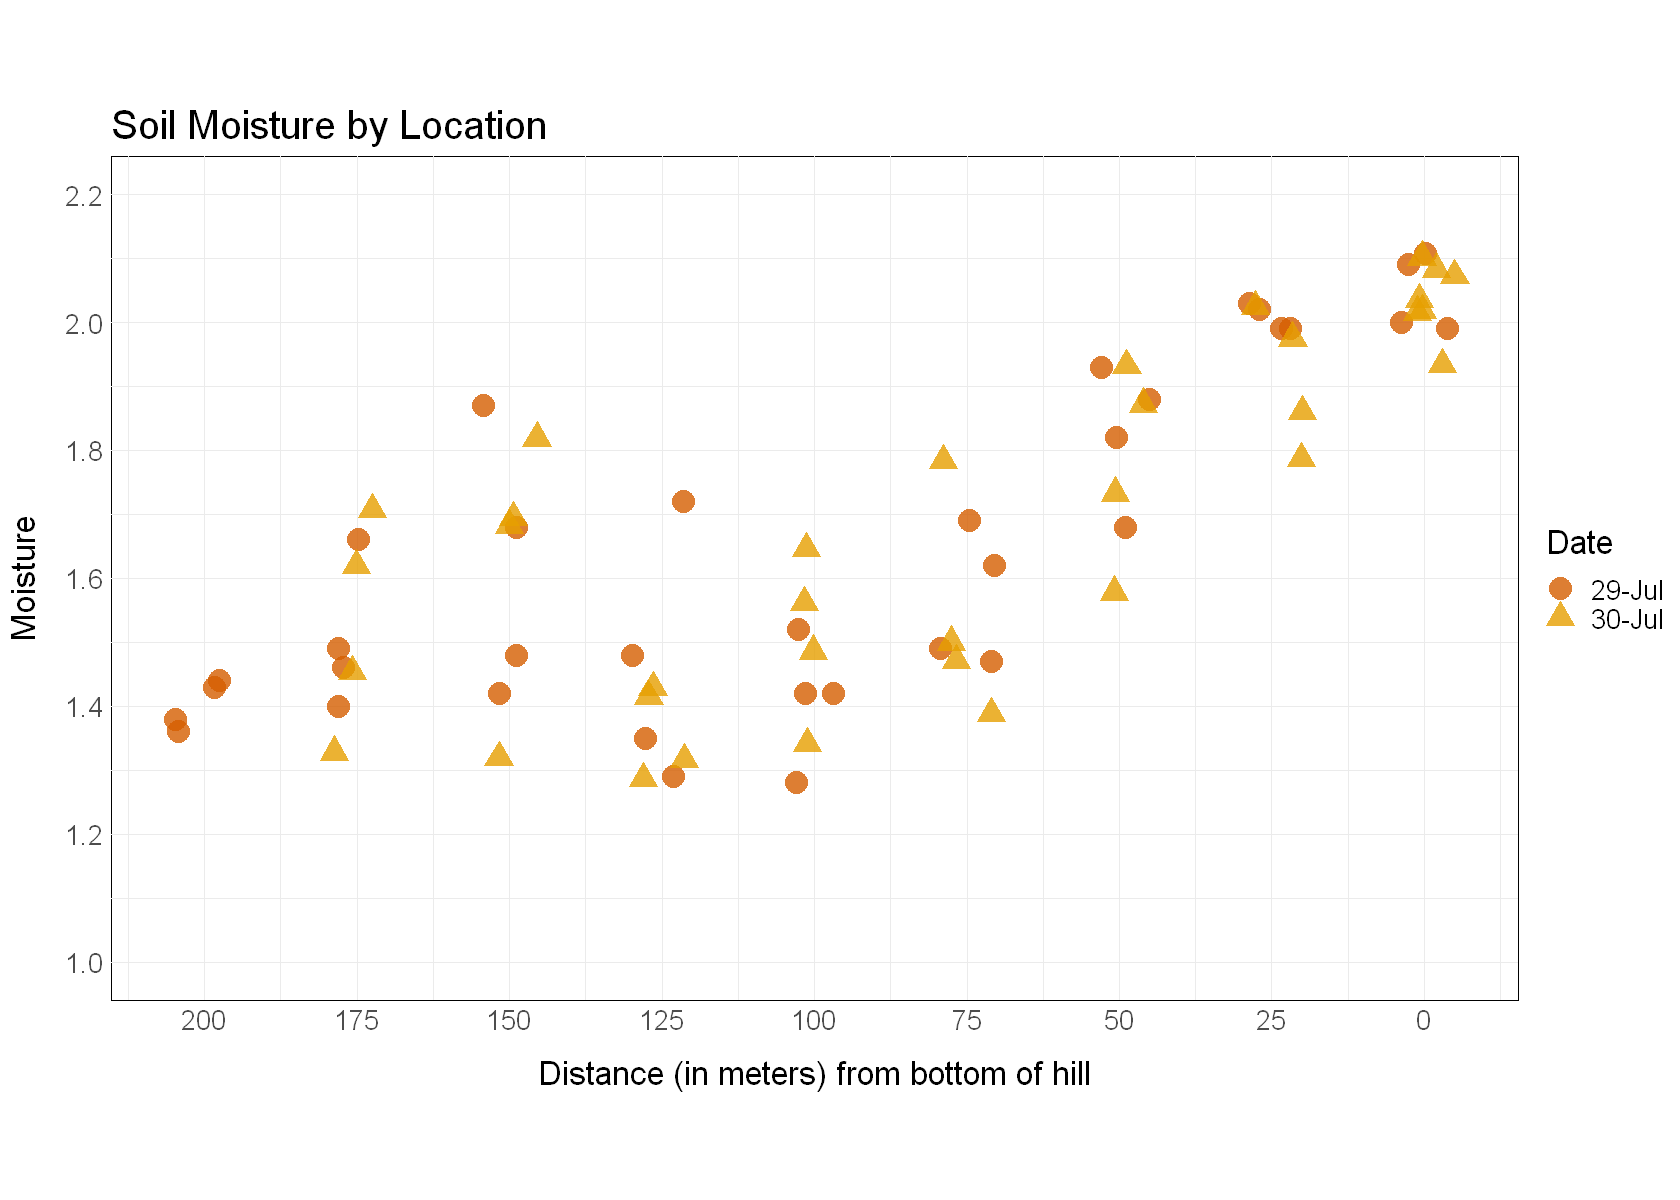

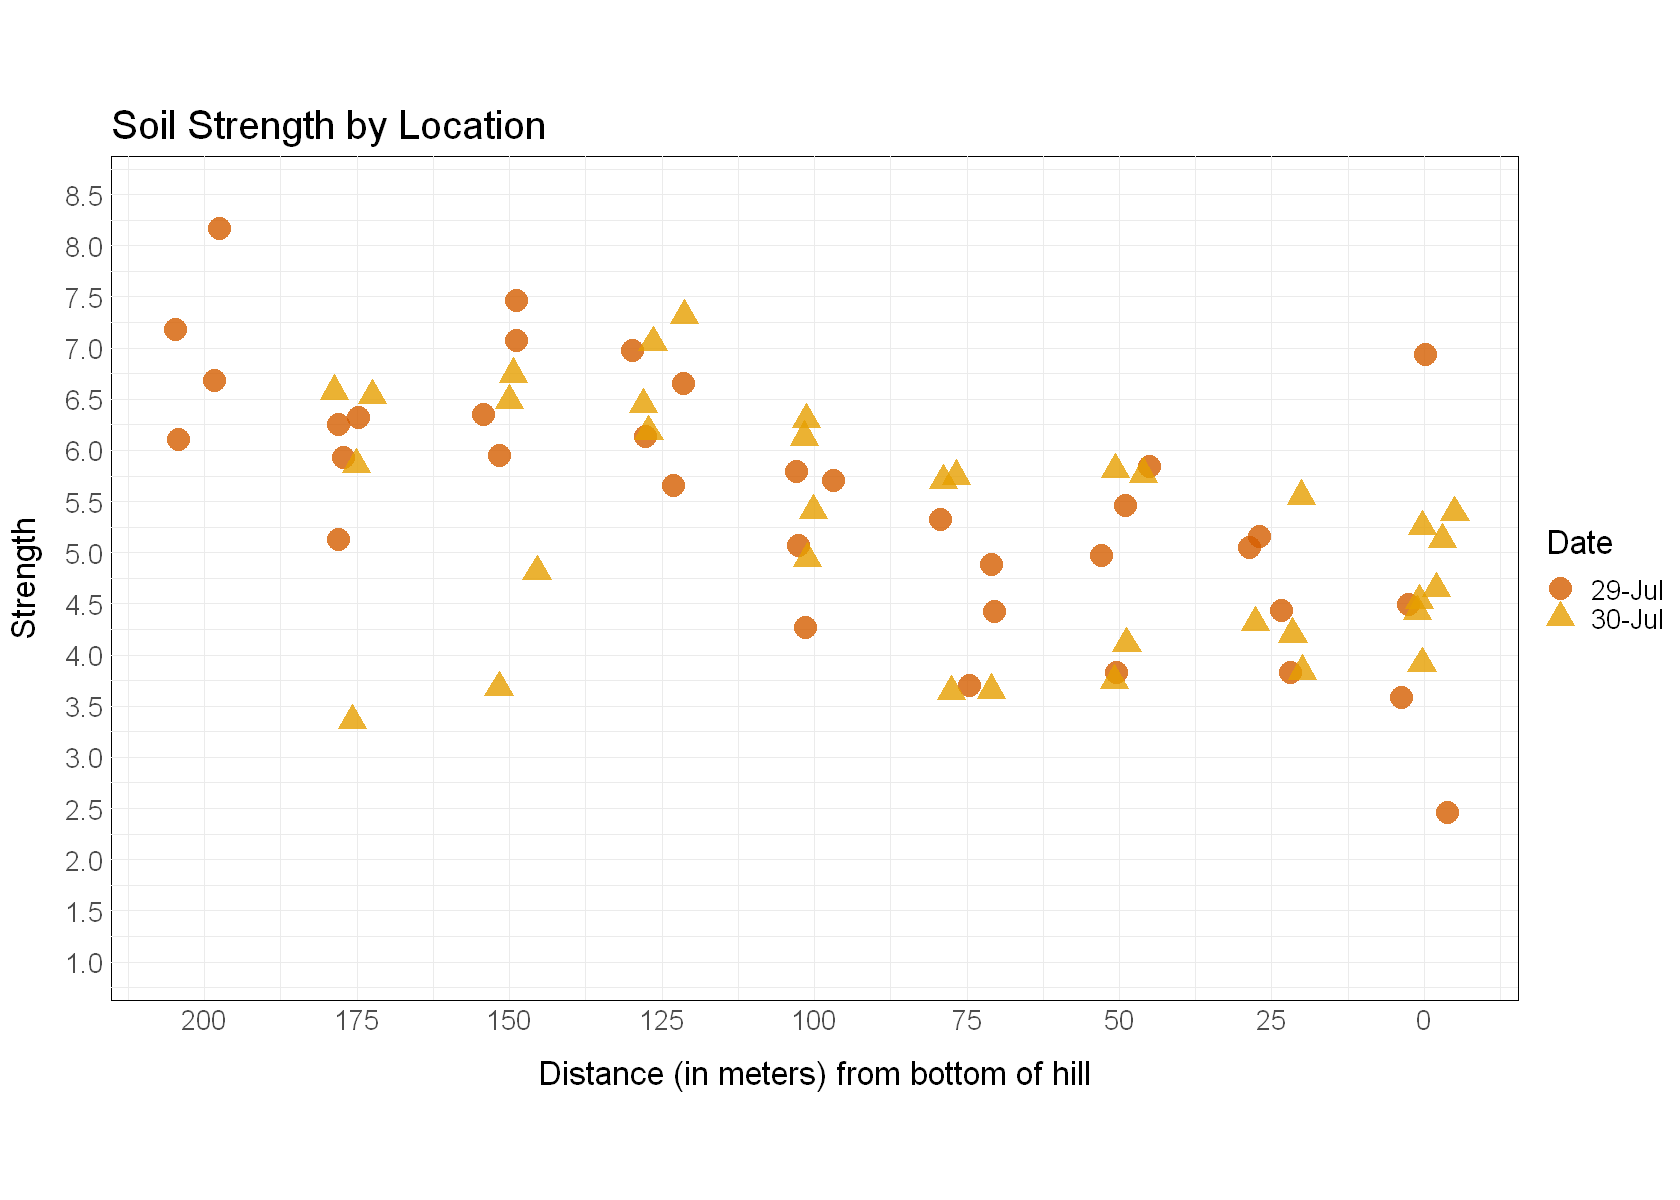

In [2]:
# moisture by location plot for data collection on two days in July 2019
WissDat.Transect<- rbind(July29, July30)
options (repr.plot.width=14, repr.plot.height=10)
WissDat.Transect$DistJitter <- jitter(WissDat.Transect$Distance, amount = 5)
print (ggplot(WissDat.Transect, aes(x=DistJitter, y=Moisture, color=Date, shape=Date)) +
    geom_point(size=6, alpha=.8) +
    scale_x_reverse (name = "Distance (in meters) from bottom of hill", breaks = seq(0,200,25)) +
    scale_y_continuous (breaks = seq(1, 2.2, .2), limits = c(1, 2.2)) +
    scale_color_manual (values = cbp1) +
    theme_minimal() +
    ggtitle ("Soil Moisture by Location") +
    theme (text = element_text(size=20), 
           axis.title.x = element_text(margin = margin(15,0,0,0)),
           axis.title.y = element_text(margin = margin(0,15,0,0)),
           panel.background = element_rect(fill = NA, color = "black"),
           aspect.ratio = .6) )

# strength by location plot for data collection on two days in July 2019
options (repr.plot.width=14, repr.plot.height=10)
print (ggplot(WissDat.Transect, aes(x=DistJitter, y=Strength, color=Date, shape=Date)) +
    geom_point(size=6, alpha=.8) +
    scale_x_reverse (name = "Distance (in meters) from bottom of hill", breaks = seq(0,200,25)) +
    scale_y_continuous (breaks = seq(1, 8.5, .5), limits = c(1, 8.5)) +
    scale_color_manual (values = cbp1) +
    theme_minimal() +
    ggtitle ("Soil Strength by Location") +
    theme (text = element_text(size=20), 
           axis.title.x = element_text(margin = margin(15,0,0,0)),
           axis.title.y = element_text(margin = margin(0,15,0,0)),
           panel.background = element_rect(fill = NA, color = "black"),
           aspect.ratio = .6) )

#### *Where strength is operationalized as the slope of the force of over time.*
<img src="July2019Force.png" width="800" height="400" align="left" />

#### *During a visit in September 2020, data was collected along the same transect, but instead of 9 locations with 4 measurements each, data was collected at 38 locations (approximately 5 meters apart) with 1 measurement per location. The same sampling strategy was also used along a new transect to the NW of the original transect (see blue pins).*

<img src="SamplingEnvironmentSeptember2020.jpg" width="600" height="500" align="left" />

#### *The aim of this sampling strategy was to collect data at a higher spatial resolution, more akin to a robotic path-planning approach to data collection, to determine if patterns of decreasing soil moisture and increasing soil strength (from top of hillslope to bottom) could be replicated. The new data supports the original observed patterns from July 2019.*

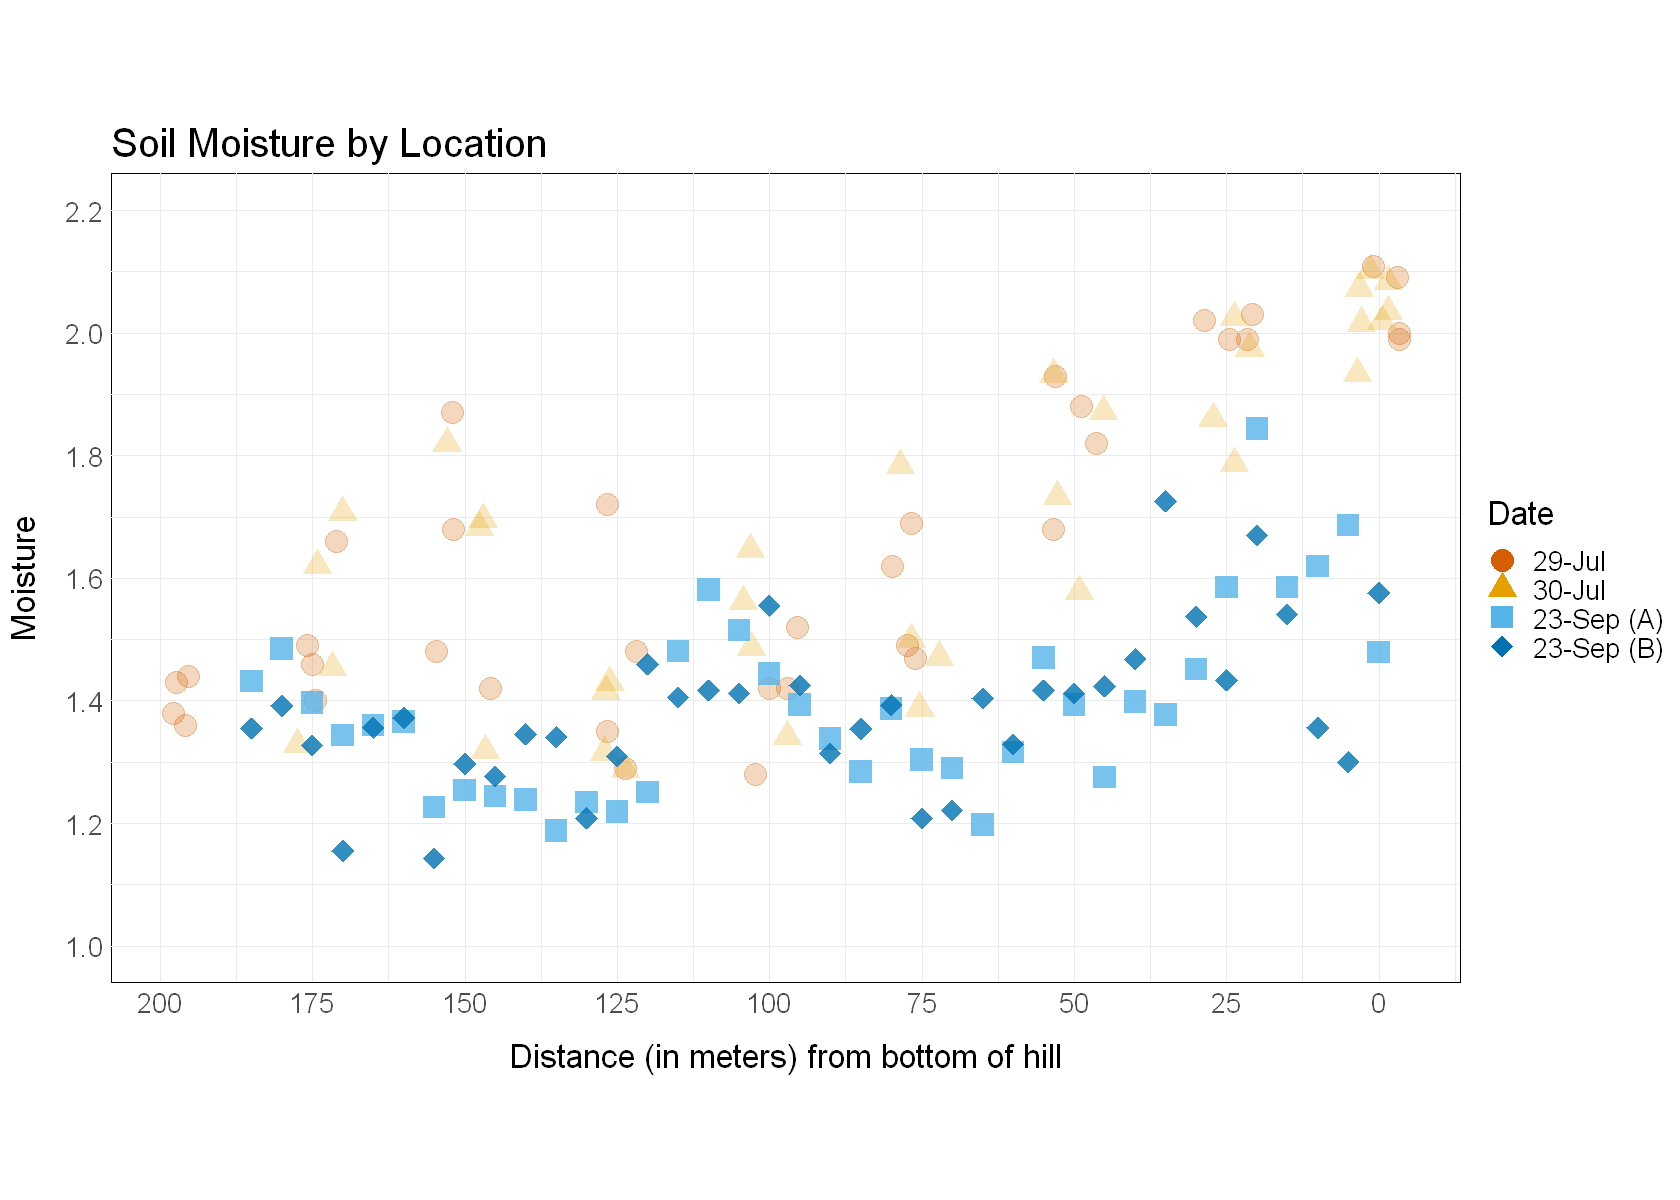

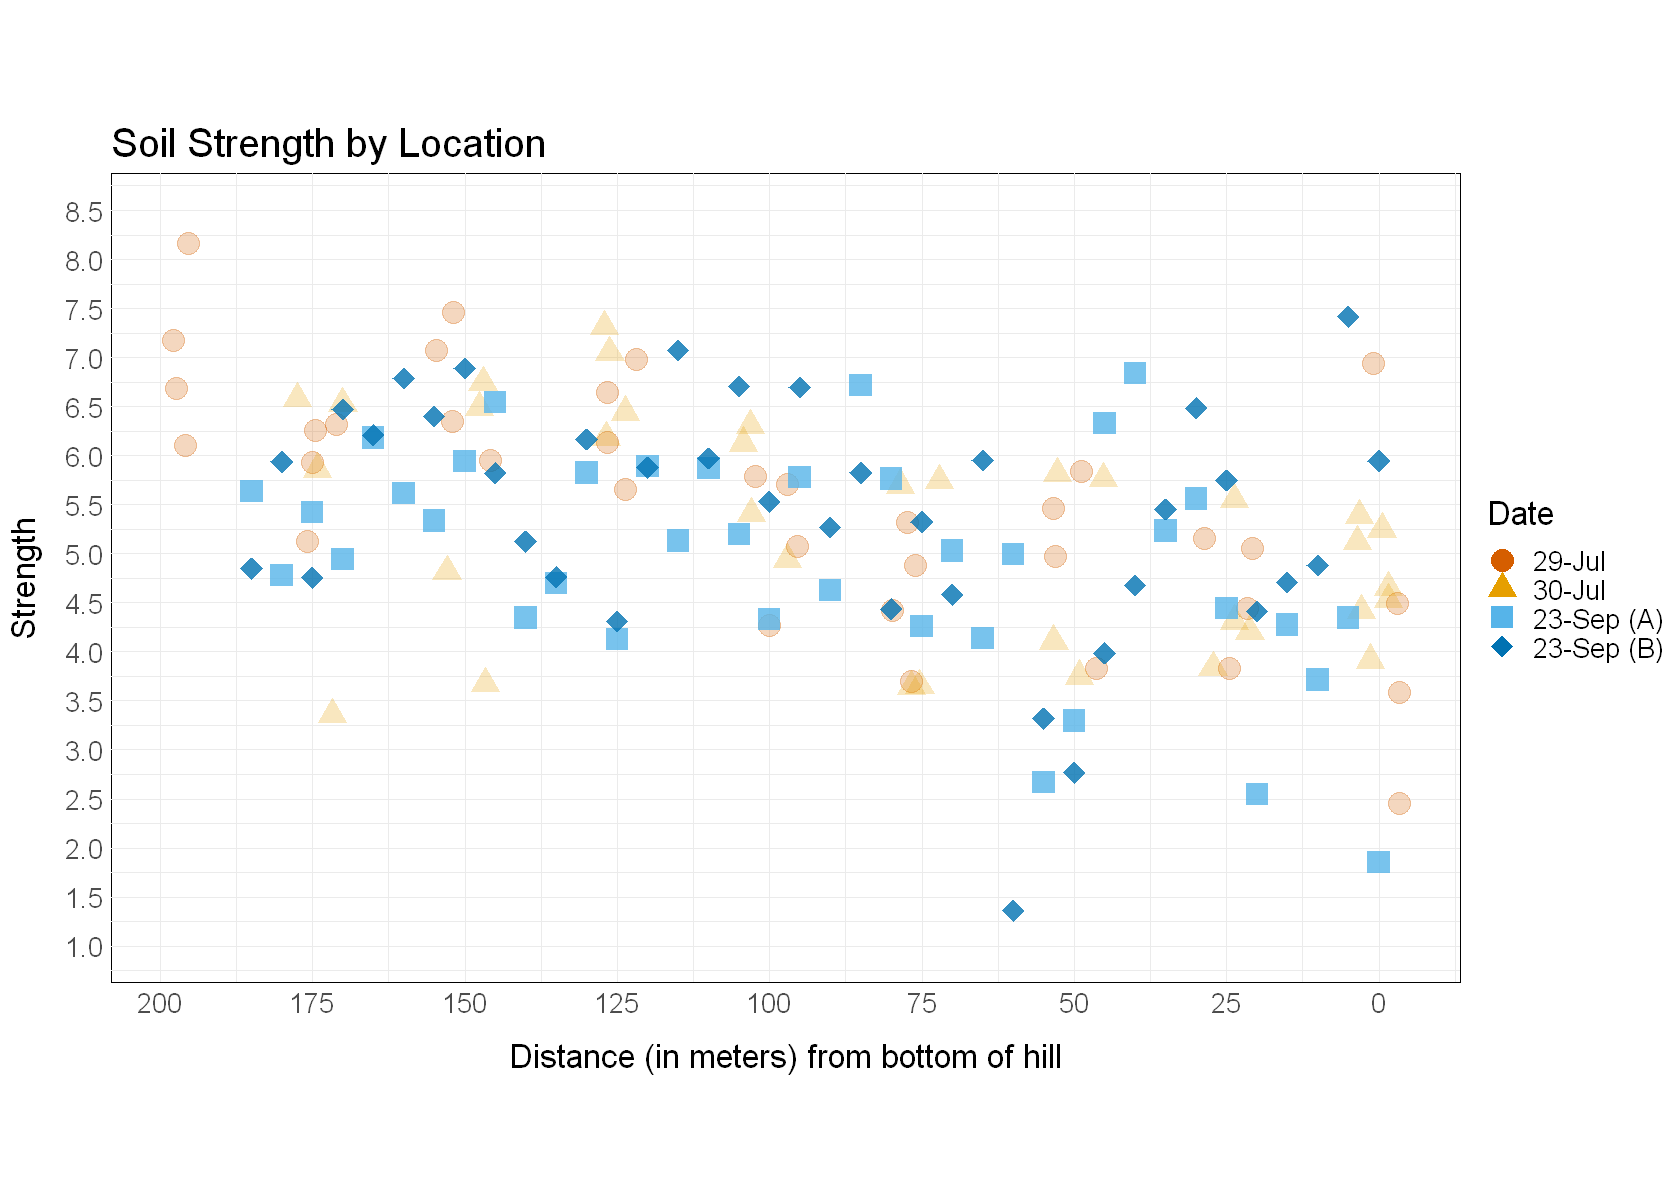

In [3]:
# moisture by location plot that now includes data collection in September 2020
WissDat.Transect <- rbind(July29, July30, Sept23a, Sept23b)
WissDat.Transect$DistJitter <- ifelse(WissDat.Transect$Date == "29-Jul" | WissDat.Transect$Date == "30-Jul",
                                      jitter(WissDat.Transect$Distance, amount = 5), WissDat.Transect$Distance)
WissDat.Transect$Date <- factor(WissDat.Transect$Date, levels = c("29-Jul", "30-Jul", "23-Sep (A)", "23-Sep (B)"))
alpha <- ifelse(WissDat.Transect$Date == "29-Jul" | WissDat.Transect$Date == "30-Jul", .25, .8)
options (repr.plot.width=14, repr.plot.height=10)
print (ggplot(WissDat.Transect, aes(x=DistJitter, y=Moisture, color=Date, shape=Date)) +
    geom_point(size=6, alpha=alpha) +
    scale_x_reverse (name = "Distance (in meters) from bottom of hill", breaks = seq(0,200,25)) +
    scale_y_continuous (breaks = seq(1, 2.2, .2), limits = c(1, 2.2)) +
    scale_color_manual (values = cbp1) +
    scale_shape_manual (values = c(19,17,15,18)) +
    theme_minimal() +
    ggtitle ("Soil Moisture by Location") +
    theme (text = element_text(size=20), 
           axis.title.x = element_text(margin = margin(15,0,0,0)),
           axis.title.y = element_text(margin = margin(0,15,0,0)),
           panel.background = element_rect(fill = NA, color = "black"),
           aspect.ratio = .6) )

# strength by location plot that now includes data collection in September 2020
options (repr.plot.width=14, repr.plot.height=10)
print (ggplot(WissDat.Transect, aes(x=DistJitter, y=Strength, color=Date, shape=Date)) +
    geom_point(size=6, alpha=alpha) +
    scale_x_reverse (name = "Distance (in meters) from bottom of hill", breaks = seq(0,200,25)) +
    scale_y_continuous (breaks = seq(1, 8.5, .5), limits = c(1, 8.5)) +
    scale_color_manual (values = cbp1) +
    scale_shape_manual (values = c(19,17,15,18)) +
    theme_minimal() +
    ggtitle ("Soil Strength by Location") +
    theme (text = element_text(size=20), 
           axis.title.x = element_text(margin = margin(15,0,0,0)),
           axis.title.y = element_text(margin = margin(0,15,0,0)),
           panel.background = element_rect(fill = NA, color = "black"),
           aspect.ratio = .6) )

<img src="September2020Force.png" width="750" height="400" align="left"/>

#### *During a visit in October 2020, data was collected along three transects, perpendicular to the original transect, roughly corresponding to the top, middle, and bottom of the hillslope (see yellow pins). Along these transects, 1 measurement was collected approximately every 5 meters.*

<img src="SamplingEnvironmentOctober2020.jpg" width="600" height="500" align="left" />

#### *The aim of this sampling strategy was to determine if our assumption about the primary gradient was accurate, namely, that changes in soil strength and moisture were greatest moving from the bottom to the top of the hill, while variation moving across the hill (side-to-side) was consistent. This assumption was supported by the data.*

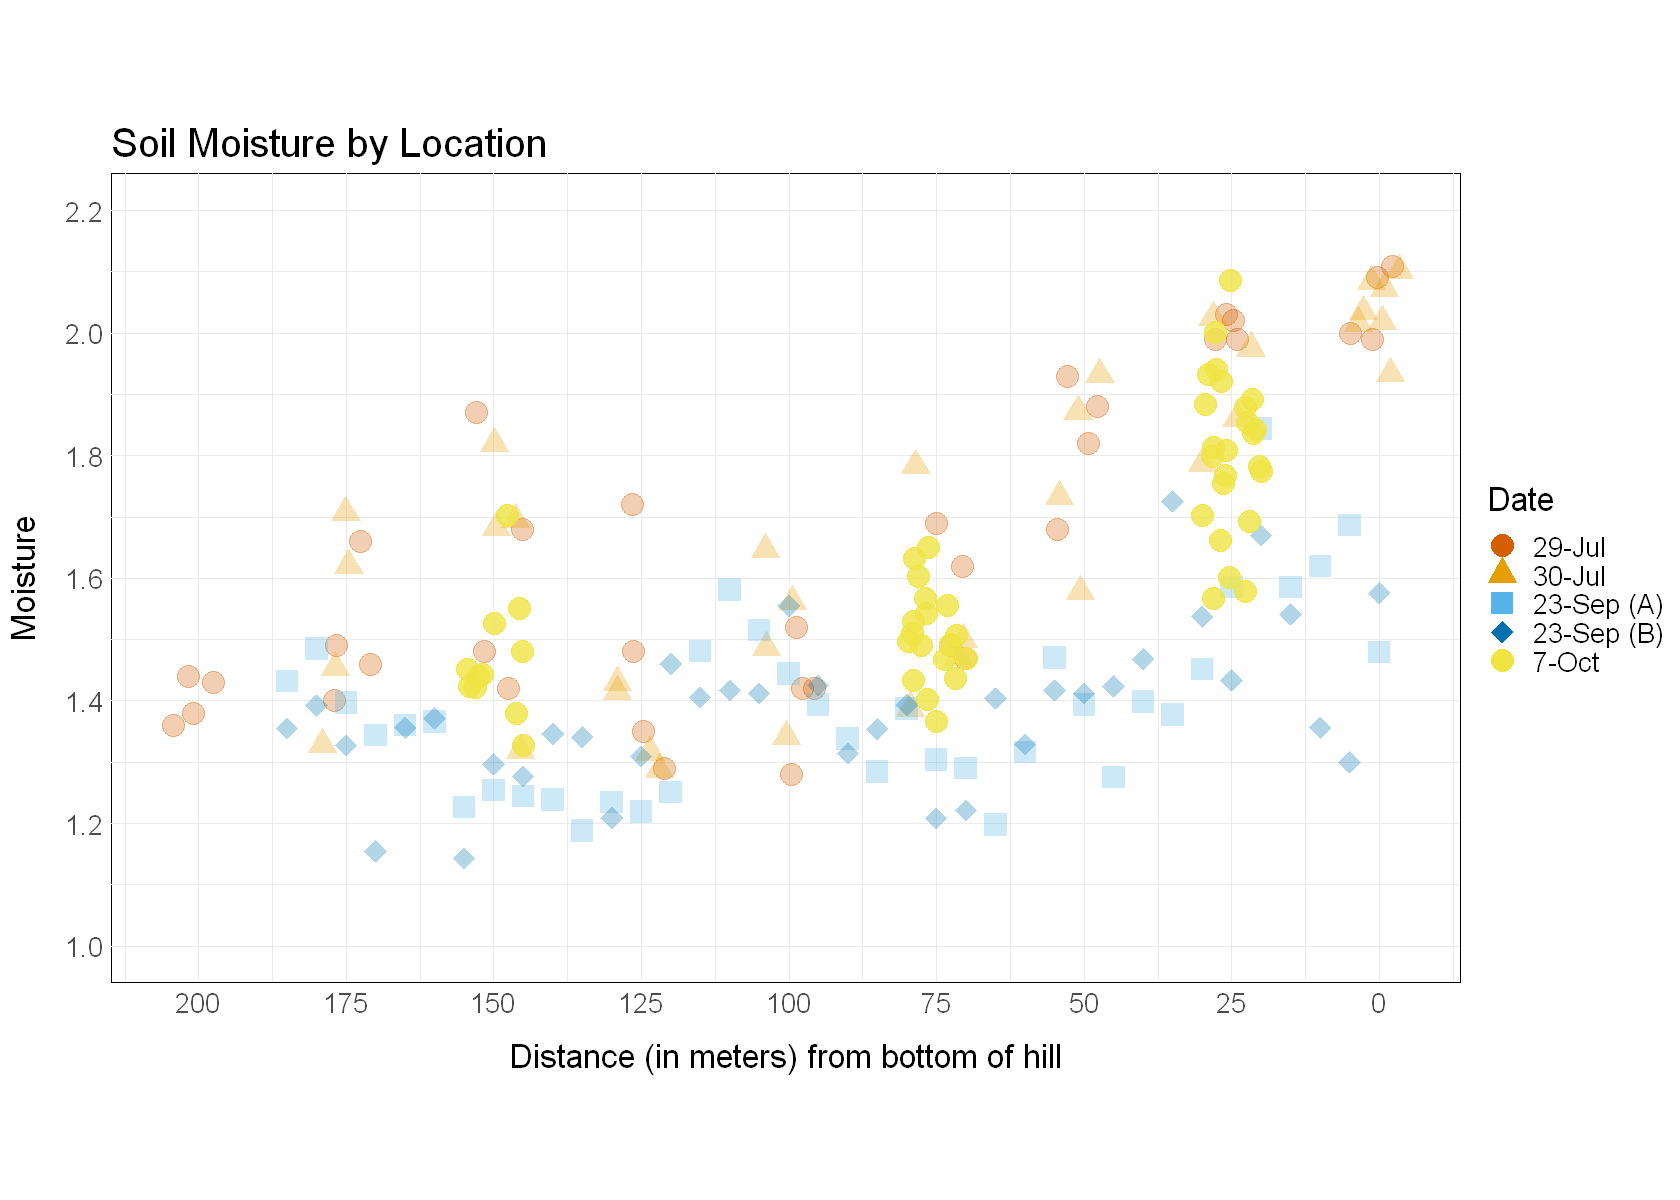

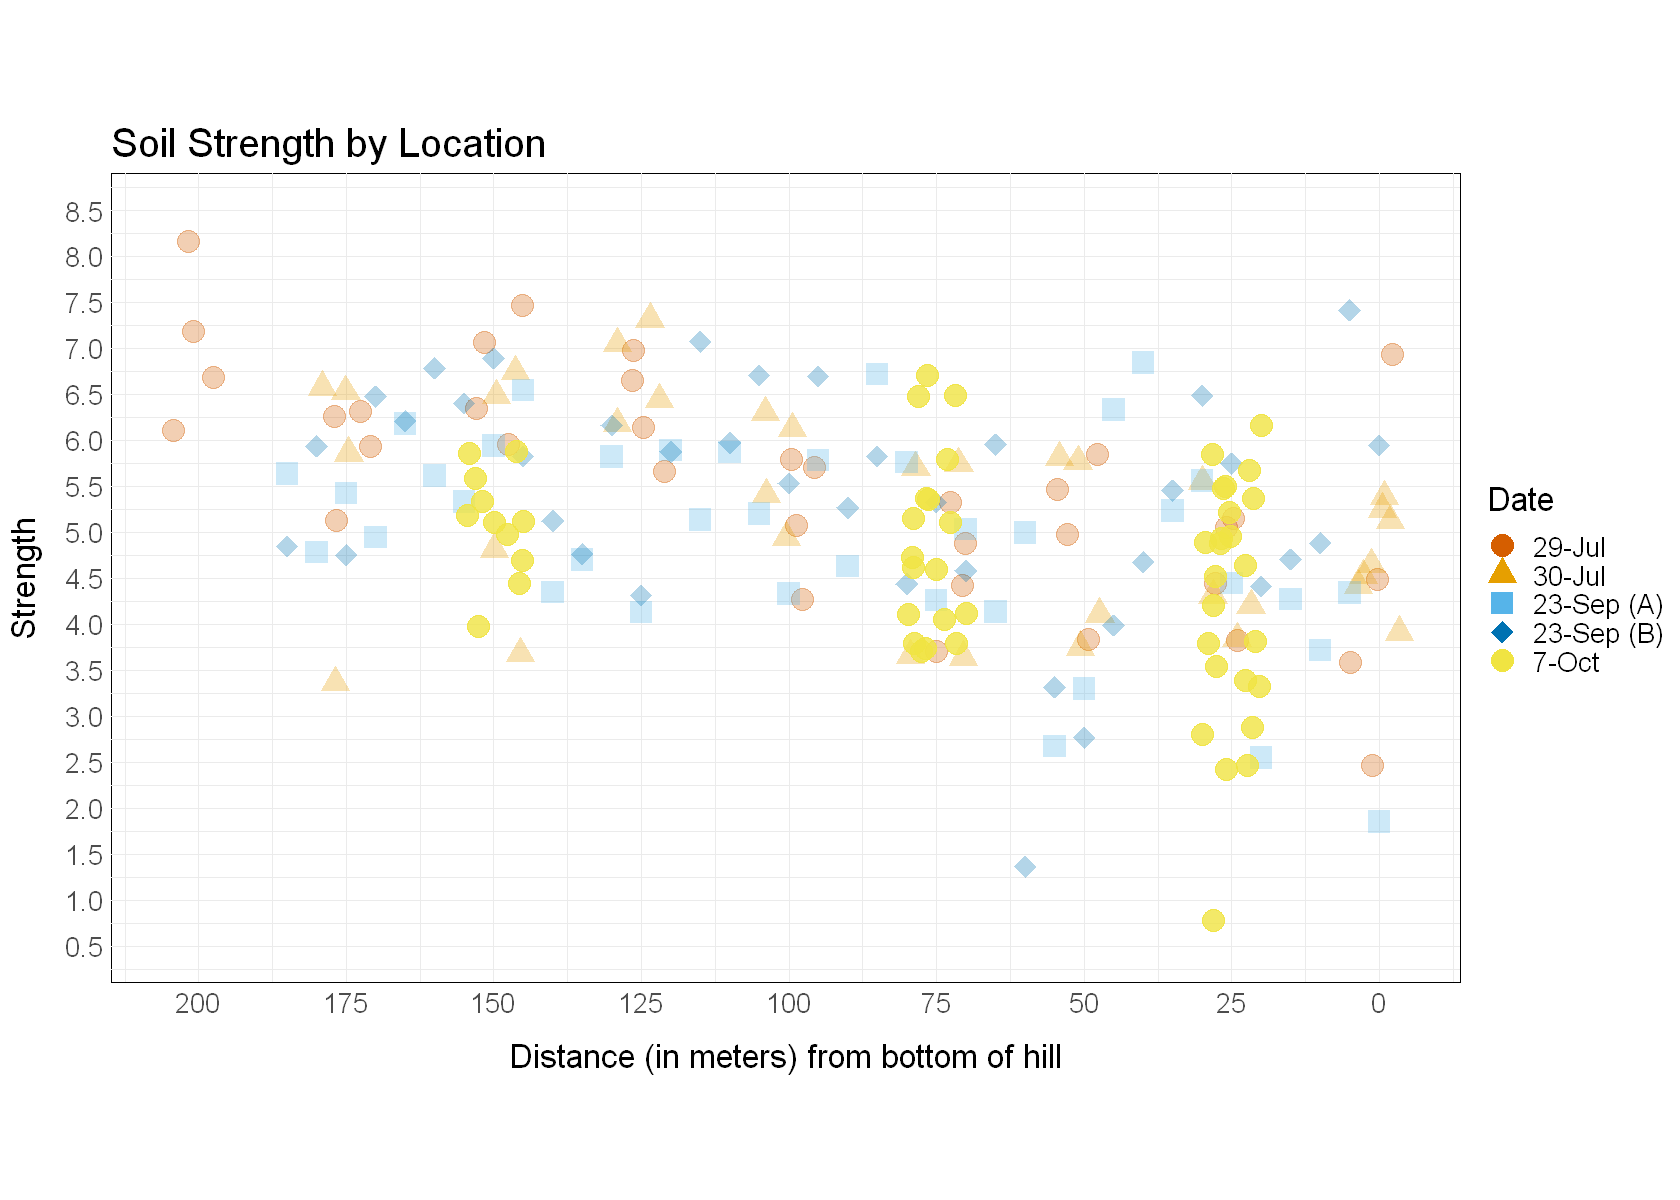

In [4]:
# moisture by location plot that now includes data collection in October 2020
WissDat.Transect <- rbind(July29, July30, Sept23a, Sept23b, Oct7)
WissDat.Transect$DistJitter <- ifelse(WissDat.Transect$Date == "29-Jul" | WissDat.Transect$Date == "30-Jul" | 
                                      WissDat.Transect$Date == "7-Oct", jitter(WissDat.Transect$Distance, 
                                      amount = 5), WissDat.Transect$Distance)
WissDat.Transect$Date <- factor(WissDat.Transect$Date, levels = c("29-Jul", "30-Jul", "23-Sep (A)", "23-Sep (B)", "7-Oct"))
alpha <- ifelse(WissDat.Transect$Date == "7-Oct", .8, .3)
options (repr.plot.width=14, repr.plot.height=10)
print (ggplot(WissDat.Transect, aes(x=DistJitter, y=Moisture, color=Date, shape=Date)) +
    geom_point(size=6, alpha=alpha) +
    scale_x_reverse (name = "Distance (in meters) from bottom of hill", breaks = seq(0,200,25)) +
    scale_y_continuous (breaks = seq(1, 2.2, .2), limits = c(1, 2.2)) +
    scale_color_manual (values = cbp1) +
    scale_shape_manual (values = c(19,17,15,18,19)) +
    theme_minimal() +
    ggtitle ("Soil Moisture by Location") +
    theme (text = element_text(size=20), 
           axis.title.x = element_text(margin = margin(15,0,0,0)),
           axis.title.y = element_text(margin = margin(0,15,0,0)),
           panel.background = element_rect(fill = NA, color = "black"),
           aspect.ratio = .6) )

# strength by location plot that now includes data collection in October 2020
options (repr.plot.width=14, repr.plot.height=10)
print (ggplot(WissDat.Transect, aes(x=DistJitter, y=Strength, color=Date, shape=Date)) +
    geom_point(size=6, alpha=alpha) +
    scale_x_reverse (name = "Distance (in meters) from bottom of hill", breaks = seq(0,200,25)) +
    scale_y_continuous (breaks = seq(0.5, 8.5, .5), limits = c(0.5, 8.5)) +
    scale_color_manual (values = cbp1) +
    scale_shape_manual (values = c(19,17,15,18,19)) +
    theme_minimal() +
    ggtitle ("Soil Strength by Location") +
    theme (text = element_text(size=20), 
           axis.title.x = element_text(margin = margin(15,0,0,0)),
           axis.title.y = element_text(margin = margin(0,15,0,0)),
           panel.background = element_rect(fill = NA, color = "black"),
           aspect.ratio = .6) )

<img src="October2020Force.png" width="900" height="400" align="left"/>

#### *During a visit in May 2022, data was collected using an algorithmically-generated, variance based sampling strategy. Initially 4 canidate paths were generated offline, with path d selected the day of the field outing.*
#### *In variance based planning strategy, we start with zero knowledge about the region being sampled. The first sampling point is chosen randomly close to the robot’s start position. Then a model is fit (Gaussian Process Model) on that sample data to obtain an estimate of uncertainty in the rectangular region. Then a fixed set of waypoints around the robot’s current position are evaluated for uncertainty, and the location with highest uncertainty is chosen to sample next. There is some randomness coming from the model fitting that makes the paths look different. But overall, they cover a similar region.*

<img src="PathOptionsMay2022.png" width="600" height="500" align="left" />

#### *Data was collected at the waypoint locations along path d (see green pins), with 1 measurement taken per location.*

<img src="SamplingEnvironmentMay2022v1.jpg" width="470" height="370" align="left" />
<img src="SamplingEnvironmentMay2022v2.jpg" width="470" height="370" align="right" />

##### The aim of this sampling strategy was to determine if any new insights could be gleaned from following a path NOT chosen by a human expert field scientist.

##### There was a rainfall in the early morning of the field day that ended 3 hours before field work started, .46 inches total accumulation. This produced a wetter profile of soil moisture relative to previous field days at this location.

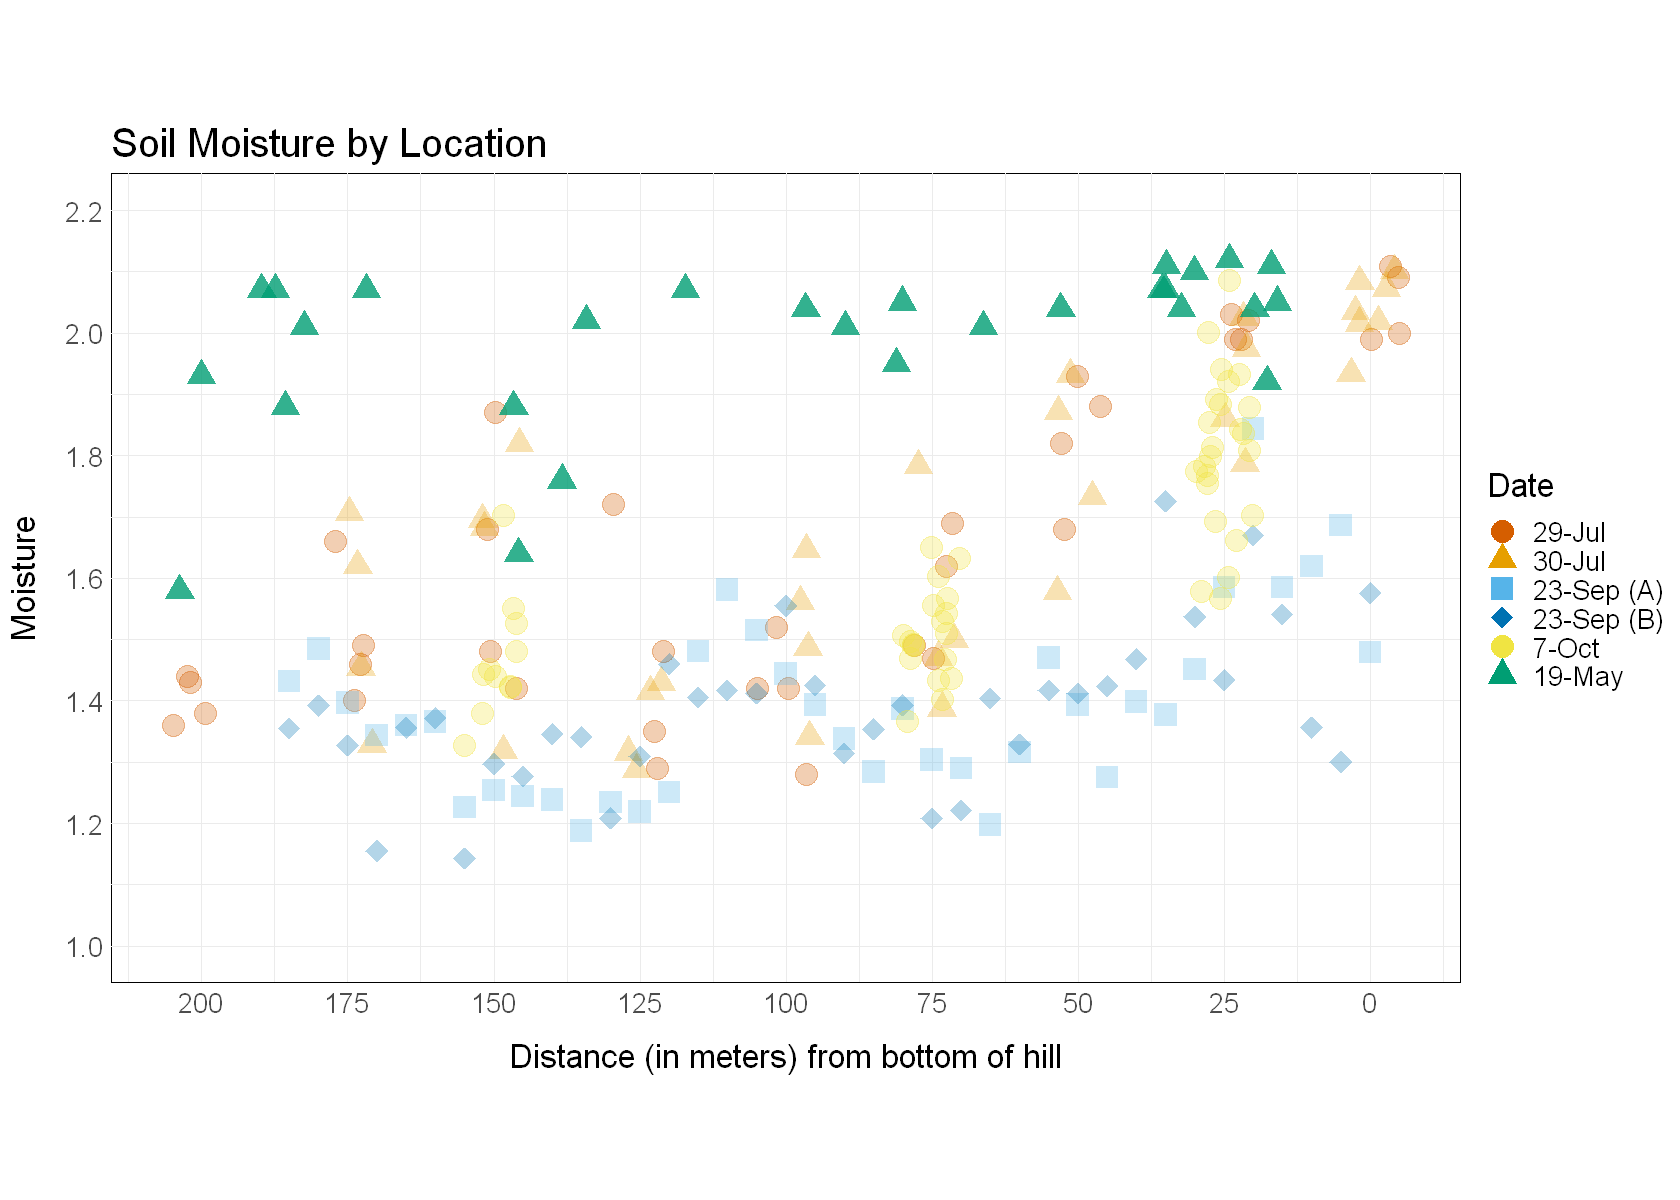

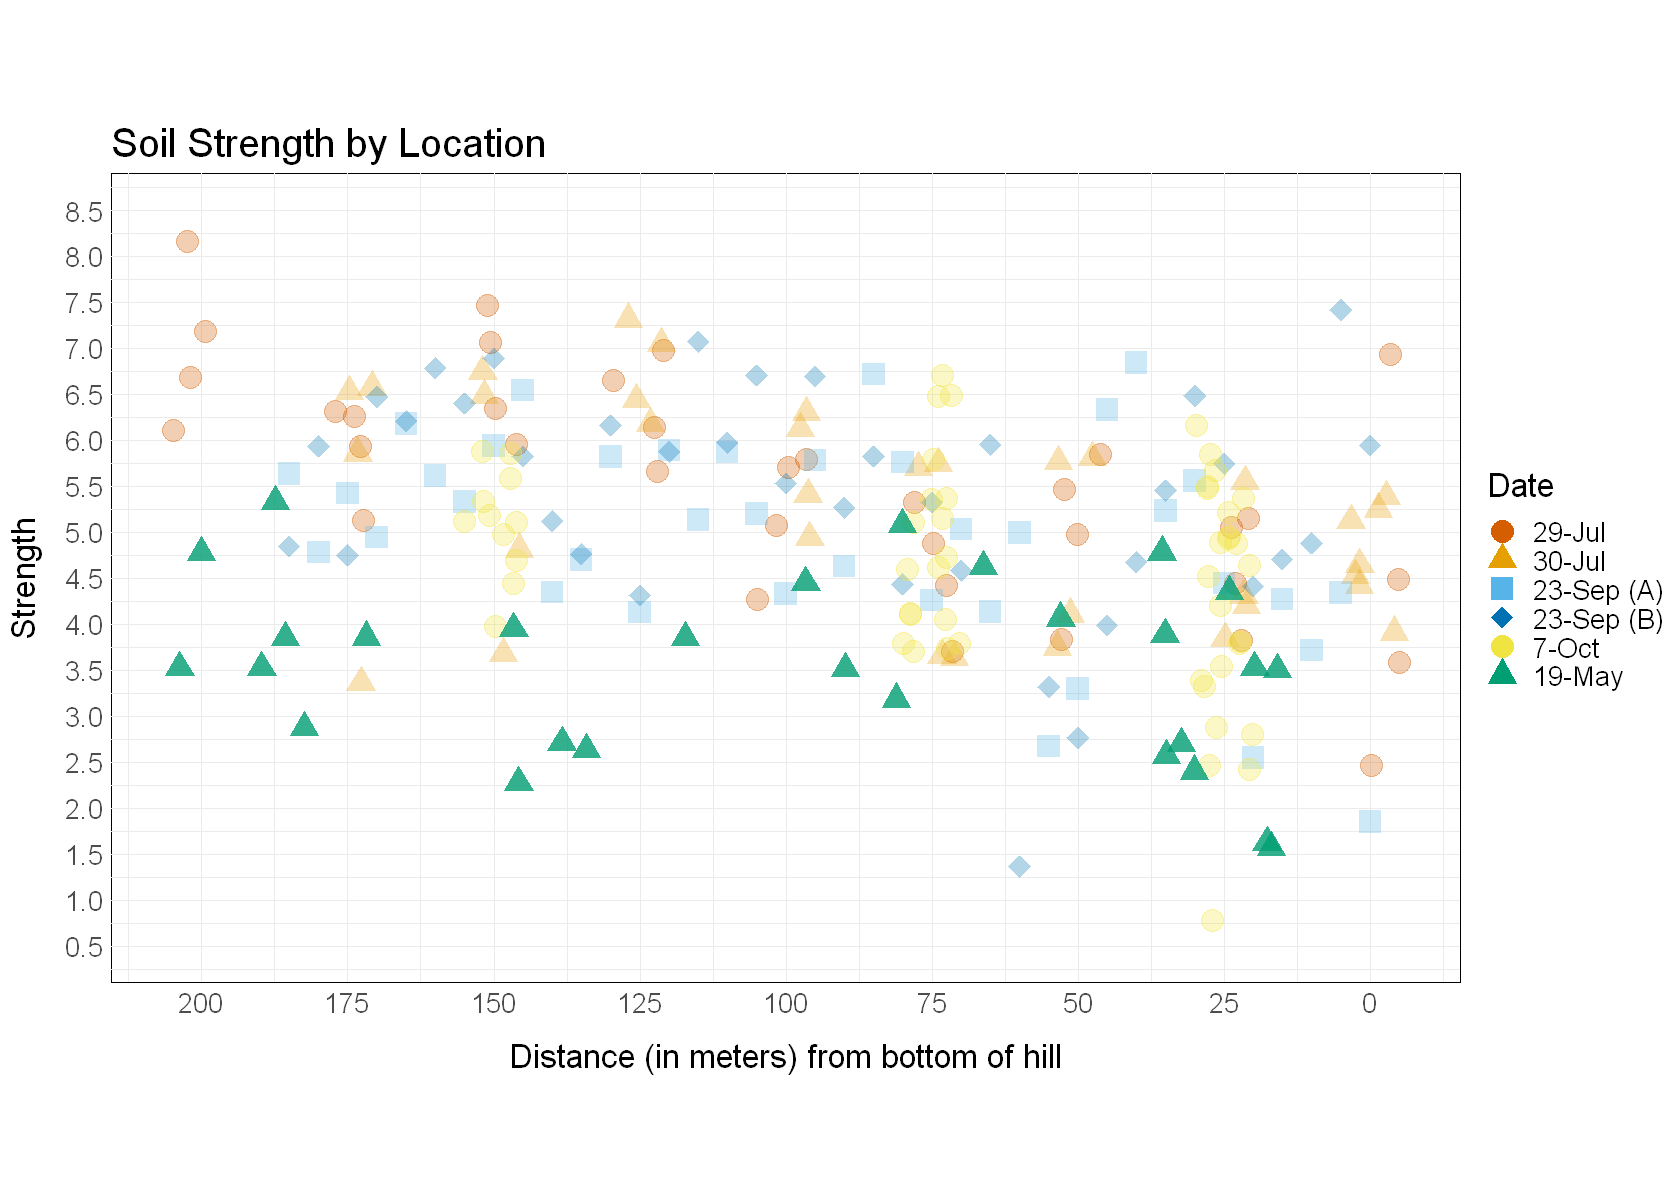

In [5]:
# moisture by location plot that now includes data collection in May 2022
WissDat.Transect <- rbind(July29, July30, Sept23a, Sept23b, Oct7, May19)
WissDat.Transect$DistJitter <- ifelse(WissDat.Transect$Date == "29-Jul" | WissDat.Transect$Date == "30-Jul" | 
                                      WissDat.Transect$Date == "7-Oct" | WissDat.Transect$Date == "19-May" , jitter(WissDat.Transect$Distance, 
                                      amount = 5), WissDat.Transect$Distance)
WissDat.Transect$Date <- factor(WissDat.Transect$Date, levels = c("29-Jul", "30-Jul", "23-Sep (A)", "23-Sep (B)", "7-Oct", "19-May"))
alpha <- ifelse(WissDat.Transect$Date == "19-May", .8, .3)
options (repr.plot.width=14, repr.plot.height=10)
print (ggplot(WissDat.Transect, aes(x=DistJitter, y=Moisture, color=Date, shape=Date)) +
    geom_point(size=6, alpha=alpha) +
    scale_x_reverse (name = "Distance (in meters) from bottom of hill", breaks = seq(0,200,25)) +
    scale_y_continuous (breaks = seq(1, 2.2, .2), limits = c(1, 2.2)) +
    scale_color_manual (values = cbp1) +
    scale_shape_manual (values = c(19,17,15,18,19,17)) +
    theme_minimal() +
    ggtitle ("Soil Moisture by Location") +
    theme (text = element_text(size=20), 
           axis.title.x = element_text(margin = margin(15,0,0,0)),
           axis.title.y = element_text(margin = margin(0,15,0,0)),
           panel.background = element_rect(fill = NA, color = "black"),
           aspect.ratio = .6) )

# strength by location plot that now includes data collection in May 2022
options (repr.plot.width=14, repr.plot.height=10)
print (ggplot(WissDat.Transect, aes(x=DistJitter, y=Strength, color=Date, shape=Date)) +
    geom_point(size=6, alpha=alpha) +
    scale_x_reverse (name = "Distance (in meters) from bottom of hill", breaks = seq(0,200,25)) +
    scale_y_continuous (breaks = seq(0.5, 8.5, .5), limits = c(0.5, 8.5)) +
    scale_color_manual (values = cbp1) +
    scale_shape_manual (values = c(19,17,15,18,19,17)) +
    theme_minimal() +
    ggtitle ("Soil Strength by Location") +
    theme (text = element_text(size=20), 
           axis.title.x = element_text(margin = margin(15,0,0,0)),
           axis.title.y = element_text(margin = margin(0,15,0,0)),
           panel.background = element_rect(fill = NA, color = "black"),
           aspect.ratio = .6) )

<img src="5-19-22 force plot.jpg" width="400" height="400" align="left"/>

### Relationship between soil strength and moisture after rain 
#### *Following a temporal sequence of rain events, data was collected at a subset of transect locations, roughly representing the bottom, middle, and top of the hillslope, and 4 measurements were taken at each location per visit. Data is plotted for three visits occuring in August 2020. The timing of visits is indicated by the vertical gray lines on the weather profile below.*

<img src="RainTimeline.jpg" width="700" height="800" align="left" />

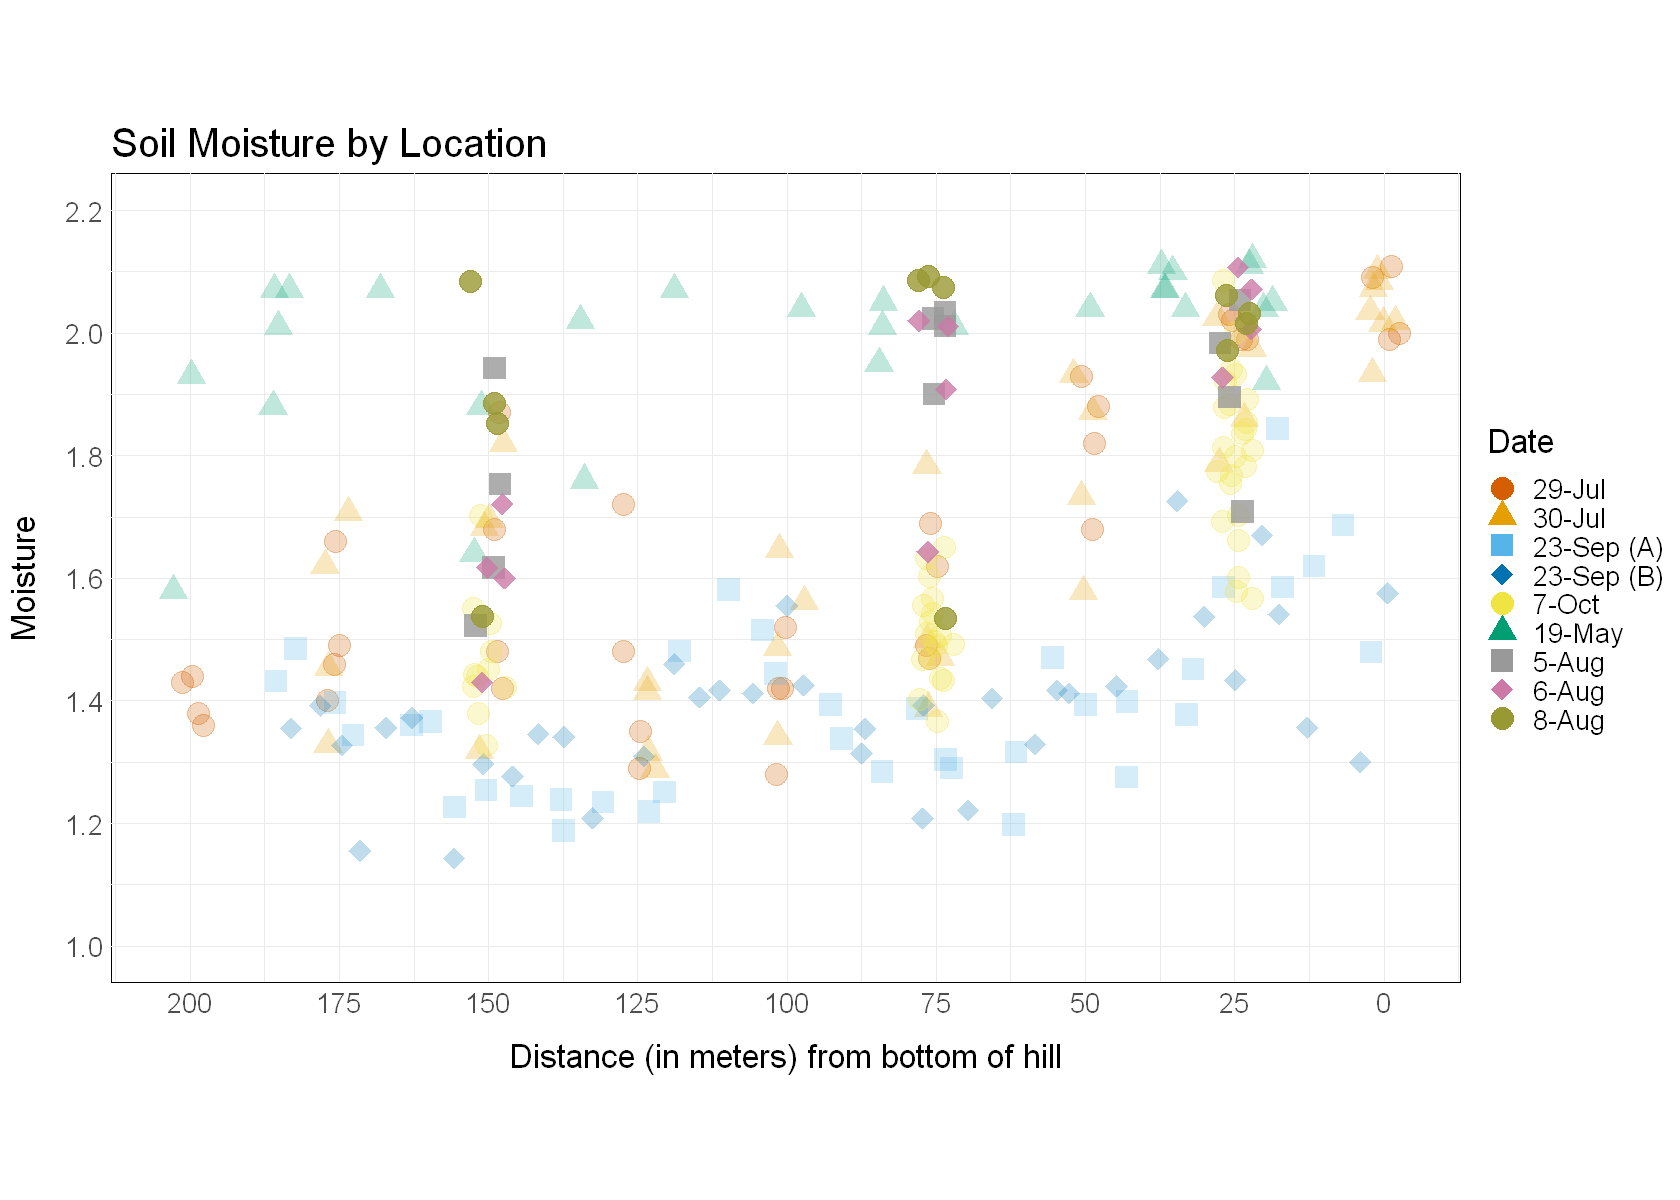

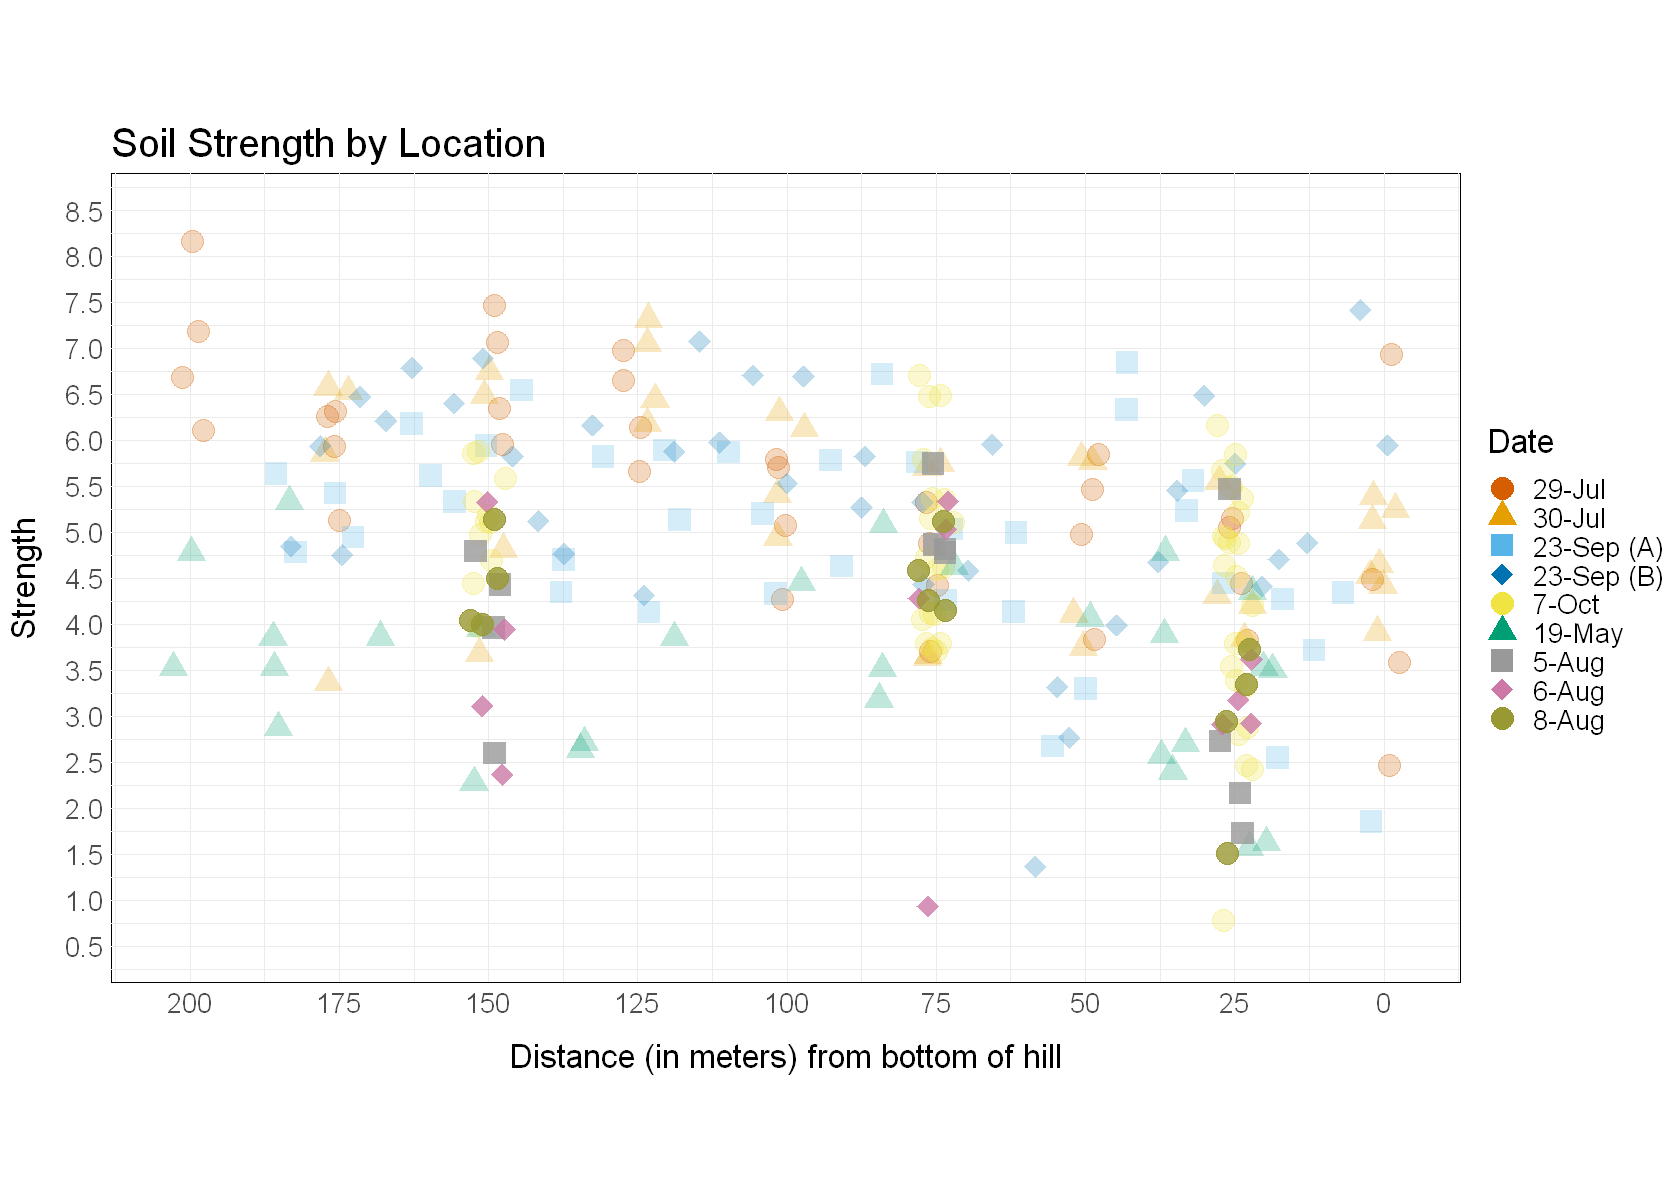

In [6]:
# moisture by location plot that now includes data collection in August 2020
WissDat.Rain <- rbind(July29, July30, Sept23a, Sept23b, Oct7, May19, Aug5, Aug6, Aug8)
WissDat.Rain$DistJitter <- ifelse(WissDat.Rain$Date == "23-Sept (A)" | WissDat.Rain$Date == "23-Sep (B)",
                                      WissDat.Rain$Distance, jitter(WissDat.Rain$Distance, amount = 5))
WissDat.Rain$Date <- factor(WissDat.Rain$Date, levels = c("29-Jul", "30-Jul", "23-Sep (A)", "23-Sep (B)",
                                                                 "7-Oct","19-May","5-Aug", "6-Aug", "8-Aug"))
alpha <- ifelse(WissDat.Rain$Date == "5-Aug" | WissDat.Rain$Date == "6-Aug" | 
                WissDat.Rain$Date == "8-Aug", .8, .25)
options (repr.plot.width=14, repr.plot.height=10)
WissDat.Rain$DistJitter <- jitter(WissDat.Rain$Distance, amount = 3)
print (ggplot(WissDat.Rain, aes(x=DistJitter, y=Moisture, color=Date, shape=Date)) +
    geom_point(size=6, alpha=alpha) +
    scale_x_reverse (name = "Distance (in meters) from bottom of hill", breaks = seq(0,200,25)) +
    scale_y_continuous (breaks = seq(1, 2.2, .2), limits = c(1, 2.2)) +
    scale_color_manual (values = cbp1) +
    scale_shape_manual (values = c(19,17,15,18,19,17,15,18,19)) +
    theme_minimal() +
    ggtitle ("Soil Moisture by Location") +
    theme (text = element_text(size=20), 
           axis.title.x = element_text(margin = margin(15,0,0,0)),
           axis.title.y = element_text(margin = margin(0,15,0,0)),
           panel.background = element_rect(fill = NA, color = "black"),
           aspect.ratio = .6) )

# strength by location plot that now includes data collection in August 2020
options (repr.plot.width=14, repr.plot.height=10)
print (ggplot(WissDat.Rain, aes(x=DistJitter, y=Strength, color=Date, shape=Date)) +
    geom_point(size=6, alpha=alpha) +
    scale_x_reverse (name = "Distance (in meters) from bottom of hill", breaks = seq(0,200,25)) +
    scale_y_continuous (breaks = seq(0.5, 8.5, .5), limits = c(0.5, 8.5)) +
    scale_color_manual (values = cbp1) +
    scale_shape_manual (values = c(19,17,15,18,19,17,15,18,19)) +
    theme_minimal() +
    ggtitle ("Soil Strength by Location") +
    theme (text = element_text(size=20), 
           axis.title.x = element_text(margin = margin(15,0,0,0)),
           axis.title.y = element_text(margin = margin(0,15,0,0)),
           panel.background = element_rect(fill = NA, color = "black"),
           aspect.ratio = .6) )

<img src="RainEventForce.jpg" width="750" height="800" align="left"/>

### Data collection along a new hillslope on the opposite side of the Wissahickon creek
#### *In May 2022 we moved to a new hillslope located across the creek and to the SE of the original hillslope. Along this new hillslope elevation monotonically increased from SW valley to NE ridge.*
<img src="HillslopeNew.jpg" width="500" height="400" align="left" />
<img src="New_Transect.jpg" width="450" height="400" align="right" />

#### *Data was initially collected at three locations along a transect chosen by an expert human field scientist, approximating the top, middle, and bottom of the hillslope (see red pins). After seeing the data from these locations the scientist chose between 1 of 3 objectives:  (i) improve spatial coverage, (ii) explore potential discrepancy between data and hypothesis, (iii) further verify data is supporting hypothesis. Based on the selected objective, a corresponding algorithm was run to provide suggested locations to maximize the objective. The field scientist chose three new locations from these suggestions (see purple pins).*

<img src="SamplingEnvironmentMay2022v3.jpg" width="600" height="500" align="left" />

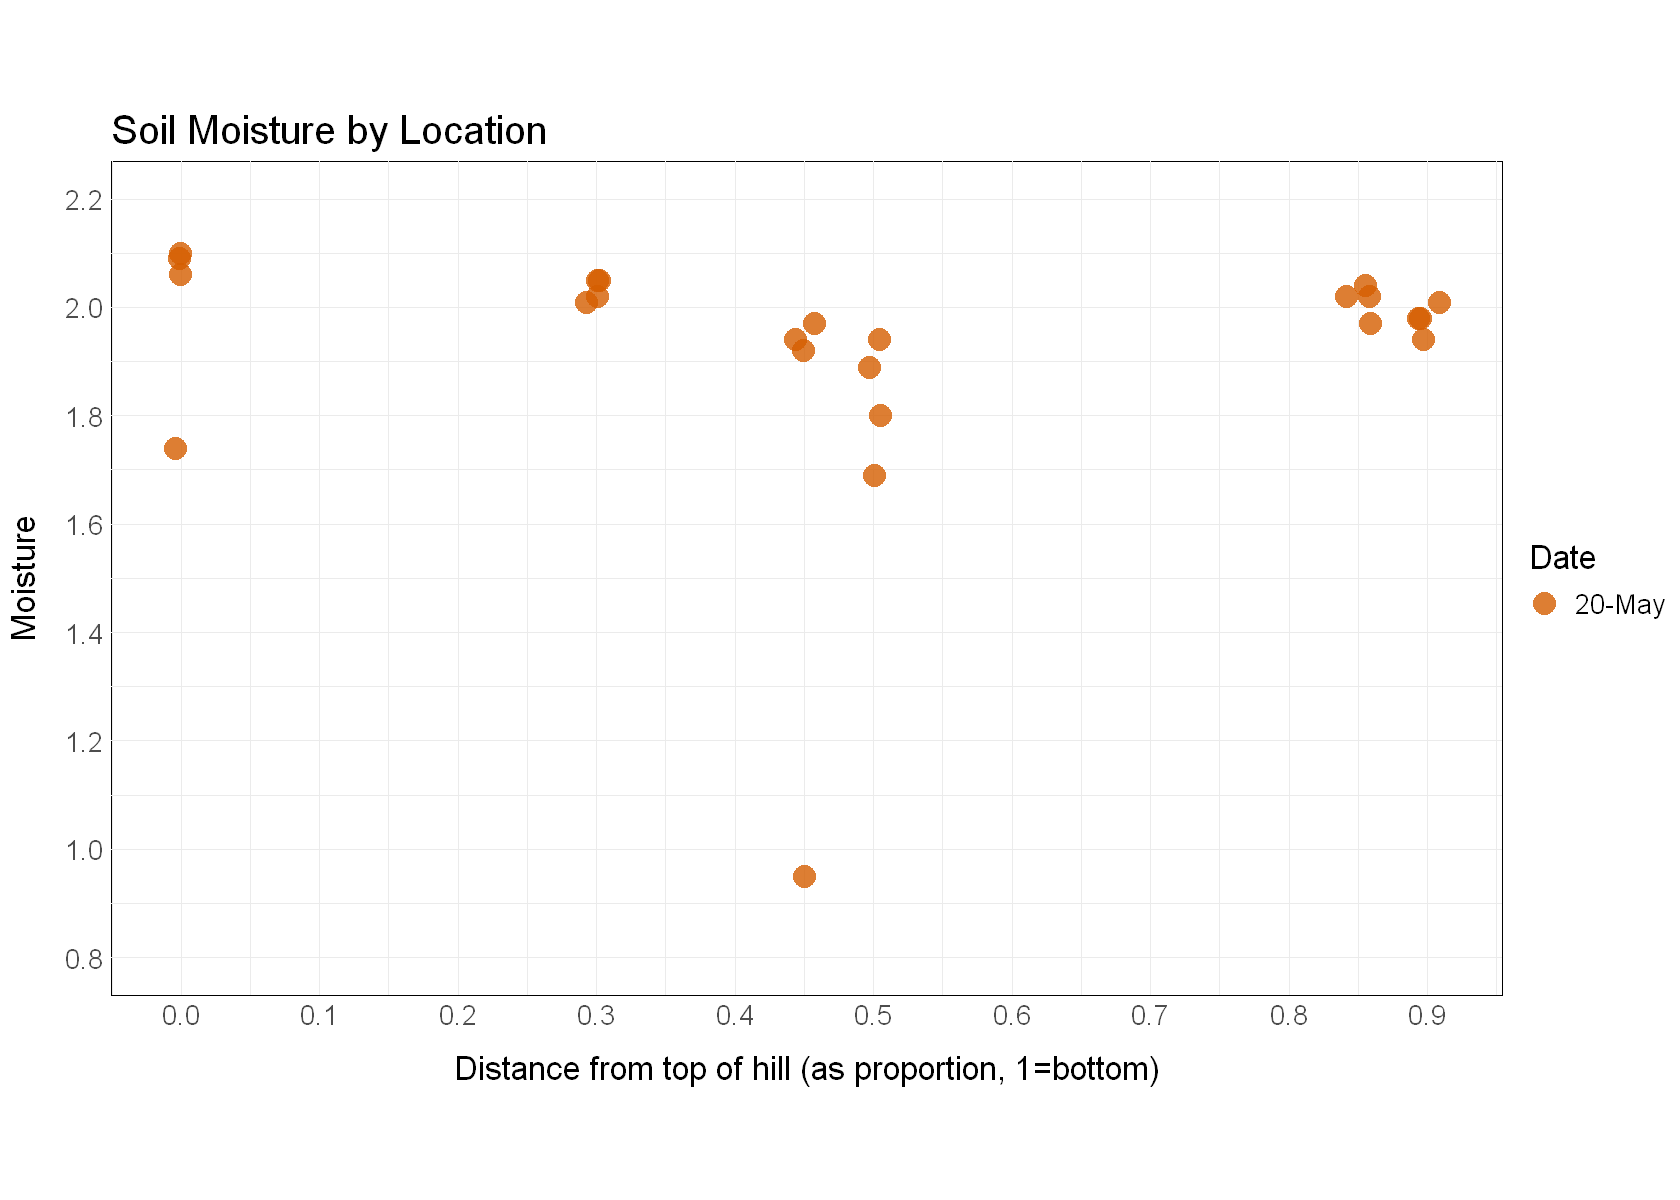

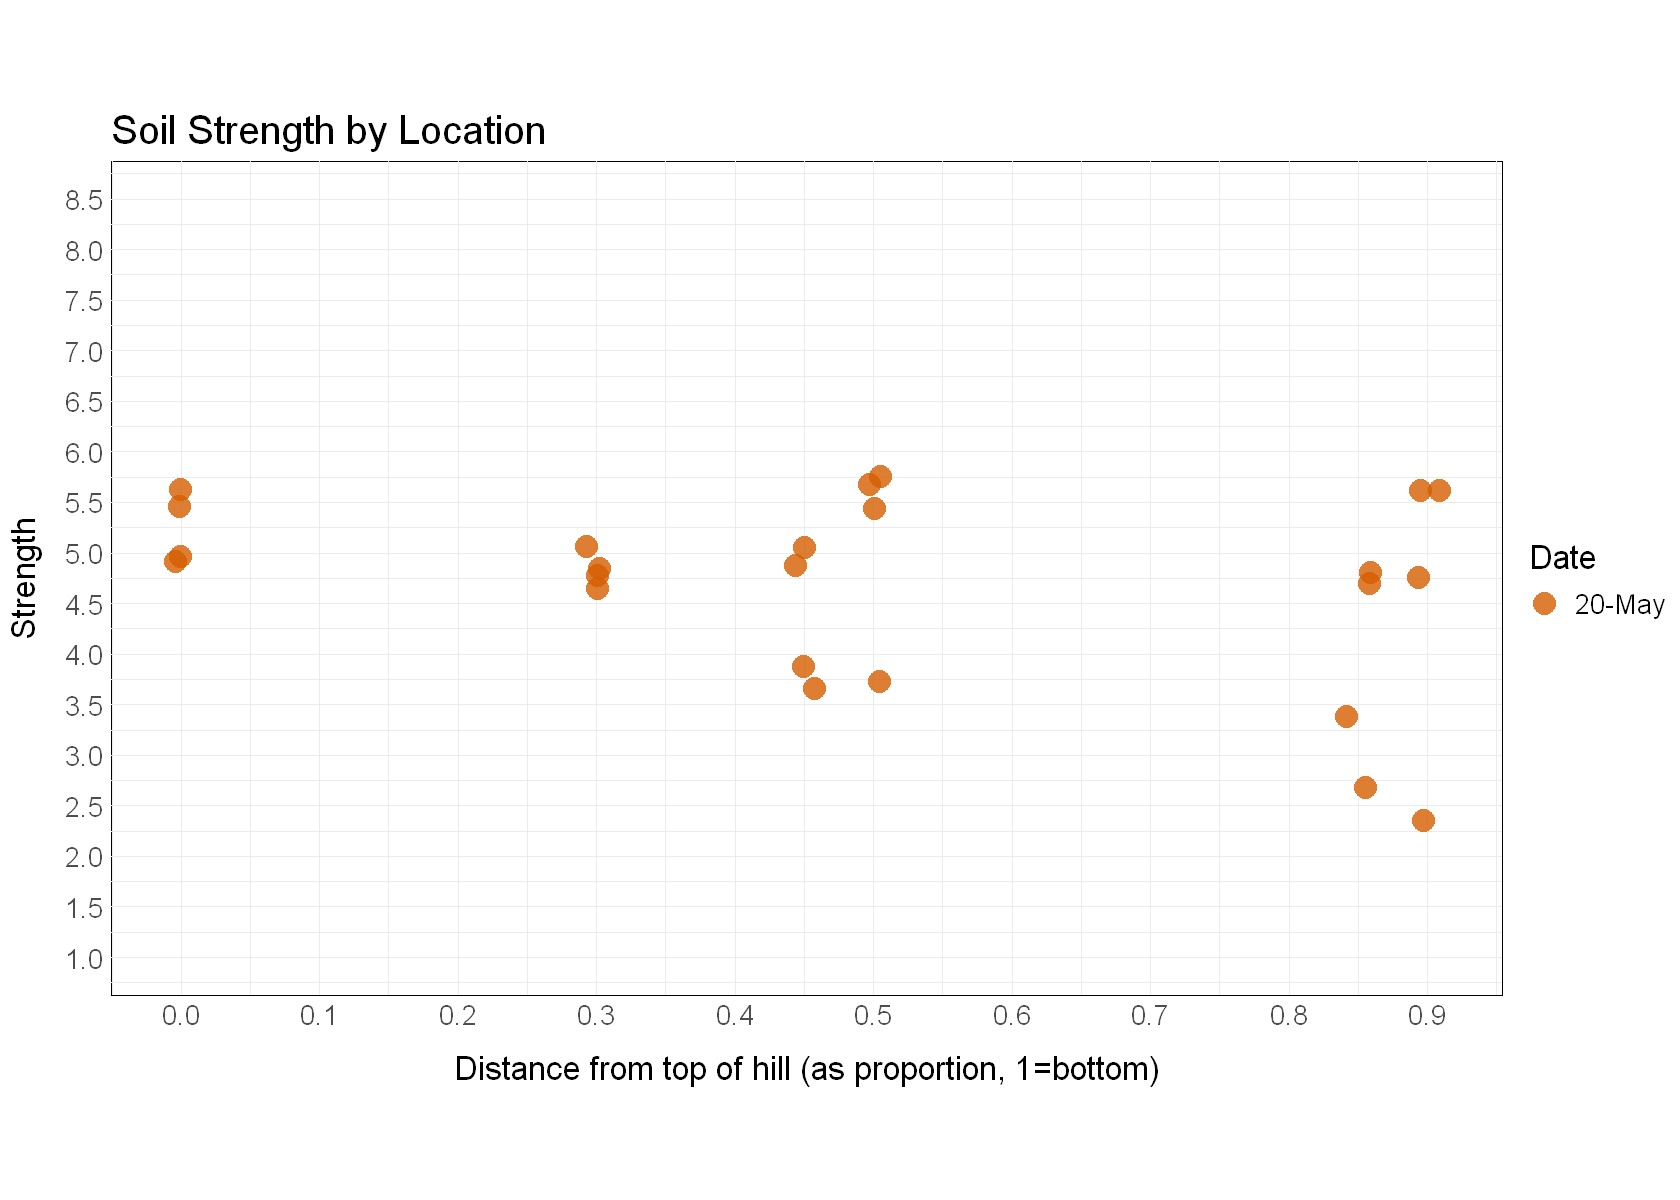

In [7]:
# moisture by location plot for data collection in May 2022
WissDat.TransectNew<- rbind(May20)
options (repr.plot.width=14, repr.plot.height=10)
WissDat.TransectNew$DistJitter <- jitter(WissDat.TransectNew$Distance, amount = 0.01)
print (ggplot(WissDat.TransectNew, aes(x=DistJitter, y=Moisture, color=Date, shape=Date)) +
    geom_point(size=6, alpha=.8) +
    scale_x_continuous (name = "Distance from top of hill (as proportion, 1=bottom)", breaks = seq(0,1,0.1)) +
    scale_y_continuous (breaks = seq(0.8, 2.2, .2), limits = c(0.8, 2.2)) +
    scale_color_manual (values = cbp1) +
    theme_minimal() +
    ggtitle ("Soil Moisture by Location") +
    theme (text = element_text(size=20), 
           axis.title.x = element_text(margin = margin(15,0,0,0)),
           axis.title.y = element_text(margin = margin(0,15,0,0)),
           panel.background = element_rect(fill = NA, color = "black"),
           aspect.ratio = .6) )

# strength by location plot for data collection in May 2022
options (repr.plot.width=14, repr.plot.height=10)
print (ggplot(WissDat.TransectNew, aes(x=DistJitter, y=Strength, color=Date, shape=Date)) +
    geom_point(size=6, alpha=.8) +
    scale_x_continuous (name = "Distance from top of hill (as proportion, 1=bottom)", breaks = seq(0,1,0.1)) +
    scale_y_continuous (breaks = seq(1, 8.5, .5), limits = c(1, 8.5)) +
    scale_color_manual (values = cbp1) +
    theme_minimal() +
    ggtitle ("Soil Strength by Location") +
    theme (text = element_text(size=20), 
           axis.title.x = element_text(margin = margin(15,0,0,0)),
           axis.title.y = element_text(margin = margin(0,15,0,0)),
           panel.background = element_rect(fill = NA, color = "black"),
           aspect.ratio = .6) )

<img src="5-20-22 force plot.jpg" width="400" height="400" align="left"/>